7807289465730900412
this node has 7 children
move:(2, 5), runs: 15118348, eval:-0.1251, principal:25 66 11 44 55 68 07 24 63 10 52 87 84 73 41 33 01 05 28 67 13 32 
move:(2, 4), runs:    27355, eval:-0.0130, principal:24 65 28 87 75 38 07 23 
move:(1, 3), runs:    23011, eval:+0.0069, principal:13 52 87 75 38 28 66 10 
move:(0, 3), runs:    22298, eval:+0.0109, principal:03 10 42 36 11 44 43 52 87 
move:(0, 5), runs:    21530, eval:+0.0155, principal:05 28 87 65 18 46 40 42 
move:(1, 4), runs:    12563, eval:+0.1110, principal:14 44 55 87 65 07 24 
move:(2, 3), runs:     4894, eval:+0.4726, principal:23 82 68 26 80 81 65 

25 66 11 44 55 68 07 24 63 10 52 87 84 73 41 33 01 05 28 67 13 32 26 70 40 42 38 08 27 83 80 81 65 18 56 60 21 75 46 50 82 74 


KeyboardInterrupt: 

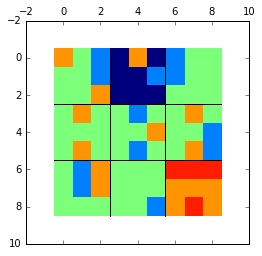

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(2,2),(3,1),(5,1),(4,5),(6,2),(7,6),(7,7)]:
    board[x]=1
for o in [(0,2),(1,2),(0,6),(1,6),(3,4),(5,4),(7,1),(8,8)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(7,2),(5,8),(8,6),(6,1),(0,4),(1,5),(5,7),(8,5),(7,8),(4,8),(3,7)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

# for move in [(4,4),(3,5)]:
#     root.actions.remove(move)
tact.fancy_board(game)

mc_sim(root,game,branch = 50,passes = 100000000)

nodes visited   12407200000
cache space     30000034
nodes stored    30000034
nodes forgotten 8162635904
current depth   18
current node    25 66 01 23 60 10 52 68 17 43 42 36 21 73 41 33 20 82
role: min
  root: work: 2107388541 pn0:  60509 pn1:  50432 dn0:   4418 dn1:  41739 

role: max
(2, 5): work: 837018337 pn0:  25943 pn1:  25696 dn0:   8314 dn1:  41739 
(1, 3): work: 184935901 pn0:   5114 pn1:   2710 dn0:  14405 dn1:  41843 
(1, 4): work: 248167238 pn0:   5961 pn1:   3451 dn0:  14809 dn1:  42166 
(2, 3): work:   6600603 pn0:    186 pn1:      0 dn0:   4418 dn1:    INF 
(0, 5): work: 362070508 pn0:   9818 pn1:   9760 dn0:  17824 dn1:  42243 
(0, 3): work: 167051758 pn0:   4660 pn1:      0 dn0:  12630 dn1:    INF 
(2, 4): work: 301544195 pn0:   8827 pn1:   8815 dn0:  15958 dn1:  42574 

expanding move (2, 5)
role: min
(6, 8): work: 346132137 pn0:  26737 pn1:  25852 dn0:   2020 dn1:  17441 
(8, 7): work: 200838749 pn0:  26428 pn1:  26210 dn0:   3498 dn1:   9314 
(6, 6): work: 2900474

KeyboardInterrupt: 

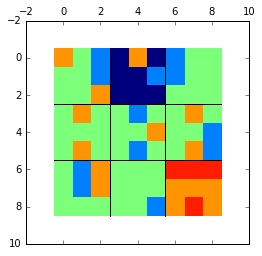

In [3]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(2,2),(3,1),(5,1),(4,5),(6,2),(7,6),(7,7)]:
    board[x]=1
for o in [(0,2),(1,2),(0,6),(1,6),(3,4),(5,4),(7,1),(8,8)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(7,2),(5,8),(8,6),(6,1),(0,4),(1,5),(5,7),(8,5),(7,8),(4,8),(3,7)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},1,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree